# EX3 - Promoções na TurinGucci

## Setup

### Importanto bibliotecas:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Carregando o dataset:

In [2]:
df = pd.read_csv('dataset3.psv', sep='|')

### Informações básicas sobre o dataset:

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       49962 non-null  float64
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    47350 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 5.4+ MB


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,49962.000000,54808.000000,50684.000000,54808.000000,54808.000000,47350.000000,54808.000000
mean,39195.830627,1.256475,273.521530,3.329256,5.865512,0.023172,63.514213,0.085170
std,22586.581449,0.612734,5422.563711,1.259993,4.265094,0.150450,13.492071,0.279137
min,1.000000,1.000000,-32.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,123456.000000,5.000000,37.000000,1.000000,99.000000,1.000000


## Questão A

Verificando valores ausentes:

In [4]:
print(df.isnull().sum())

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings         4846
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score      7458
is_promoted                0
dtype: int64


Verificando inconsistências nas features:

In [5]:
categorical_columns = ['department', 'region', 'education', 'gender', 'recruitment_channel']

for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Valores únicos para a feature '{column}':")
    print(unique_values)
    print('\n')

Valores únicos para a feature 'department':
['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal' 'quem trouxe quenga']


Valores únicos para a feature 'region':
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18' 'casa da lu na suecia']


Valores únicos para a feature 'education':
["Master's & above" "Bachelor's" nan 'Below Secondary']


Valores únicos para a feature 'gender':
['f' 'm' 'MALE' 'fEMALE' 'eu sou homem hetero homossexual!']


Valores únicos para a feature 'recruitment_channel':
['sourcing' 'other' 'referred']




Removendo a coluna "employee_id" que não deve ser relevante para o modelo:

In [6]:
df.drop('employee_id', axis=1, inplace=True)

Resolvendo valores inválidos:

In [7]:
# Feature 'department'
invalid_department = 'quem trouxe quenga'
df = df[df['department'] != invalid_department]

# Feature 'region'
invalid_region = 'casa da lu na suecia'
df = df[df['region'] != invalid_region]

# Feature 'gender'
df['gender'] = df['gender'].replace({'MALE': 'm', 'fEMALE': 'f', 'eu sou homem hetero homossexual!': 'm'})

# Feature 'age'
df = df[df['age'] <= 100]


Resolvendo valores vazios:

In [8]:
#Nível de educação vazio será substituido como "desconhecido":
df['education'].fillna('Desconhecido', inplace=True)

As features "no_of_trainings" (número de treinamentos), "previous_year_rating" (avaliação do ano anterior) e "avg_training_score" (pontuação média nas avaliações de treinamento) são importantes para o modelo de previsão de promoções. O número de treinamentos pode indicar o engajamento e desenvolvimento profissional do funcionário, enquanto a avaliação e a pontuação média de treinamento refletem o desempenho e a aquisição de habilidades. Remover observações com valores ausentes nessas features é, portanto, justificado para garantir a integridade do modelo e evitar suposições incorretas sobre valores faltantes.

In [9]:
# Mostrando o tamanho original do dataset:
print("Tamanho anterior do DataFrame:", df.shape)

#Removendo os valores vazios:
df.dropna(subset=['no_of_trainings', 'previous_year_rating', 'avg_training_score'], inplace=True)

# Resetando os índices após a remoção
df.reset_index(drop=True, inplace=True)

# Novo tamanho do DataFrame após a remoção
print("Novo tamanho do DataFrame:", df.shape)

Tamanho anterior do DataFrame: (54673, 12)
Novo tamanho do DataFrame: (43583, 12)


Formatando a feature "region" para remover o prefixo:

In [10]:
df['region'] = df['region'].str.replace('region_', '').astype(int)

Formatando o n° de treinamentos para inteiros:

In [11]:
# Convertendo a coluna 'no_of_trainings' para int
df['no_of_trainings'] = df['no_of_trainings'].astype(int)

## Questão B

### 1. Informações Gerais

In [12]:
print("Informações gerais:")
print(df.info())

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43583 entries, 0 to 43582
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            43583 non-null  object 
 1   region                43583 non-null  int32  
 2   education             43583 non-null  object 
 3   gender                43583 non-null  object 
 4   recruitment_channel   43583 non-null  object 
 5   no_of_trainings       43583 non-null  int32  
 6   age                   43583 non-null  int64  
 7   previous_year_rating  43583 non-null  float64
 8   length_of_service     43583 non-null  int64  
 9   awards_won?           43583 non-null  int64  
 10  avg_training_score    43583 non-null  float64
 11  is_promoted           43583 non-null  int64  
dtypes: float64(2), int32(2), int64(4), object(4)
memory usage: 3.7+ MB
None


### 2. Estatísticas sobre as features

In [13]:
print("\nEstatísticas descritivas das features numéricas:")
print(df.describe())


Estatísticas descritivas das features numéricas:
             region  no_of_trainings           age  previous_year_rating  \
count  43583.000000     43583.000000  43583.000000          43583.000000   
mean      15.039144         1.253883     35.058670              3.326389   
std        9.844325         0.604880      7.243455              1.260886   
min        1.000000         1.000000     20.000000              1.000000   
25%        7.000000         1.000000     30.000000              3.000000   
50%       15.000000         1.000000     34.000000              3.000000   
75%       22.000000         1.000000     39.000000              4.000000   
max       34.000000        10.000000     60.000000              5.000000   

       length_of_service   awards_won?  avg_training_score   is_promoted  
count       43583.000000  43583.000000        43583.000000  43583.000000  
mean            6.120299      0.022830           63.517266      0.084941  
std             4.041057      0.149363  

### 3. Distribuição da variável alvo

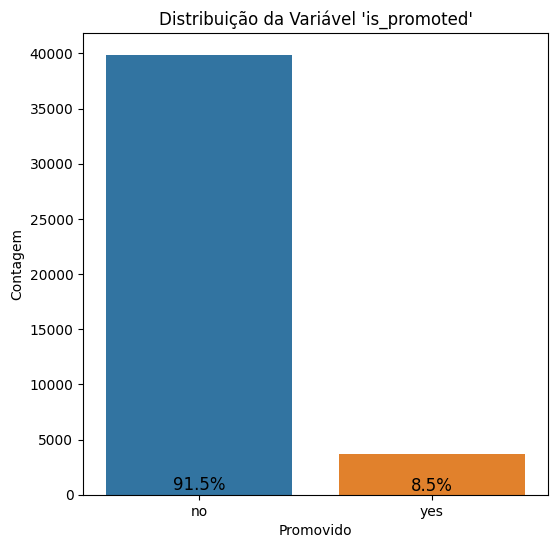

In [14]:
df['is_promoted'] = df['is_promoted'].map({0: 'no', 1: 'yes'})

promoted_percentage = df['is_promoted'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 6))
sns.countplot(x='is_promoted', data=df)
plt.title("Distribuição da Variável 'is_promoted'")
plt.xlabel("Promovido")
plt.ylabel("Contagem")


for idx, value in enumerate(promoted_percentage):
    plt.text(idx, value, f'{value:.1f}%', ha='center', va='bottom', fontsize=12)
plt.show()

#### 4. Distribuição de features relevantes:

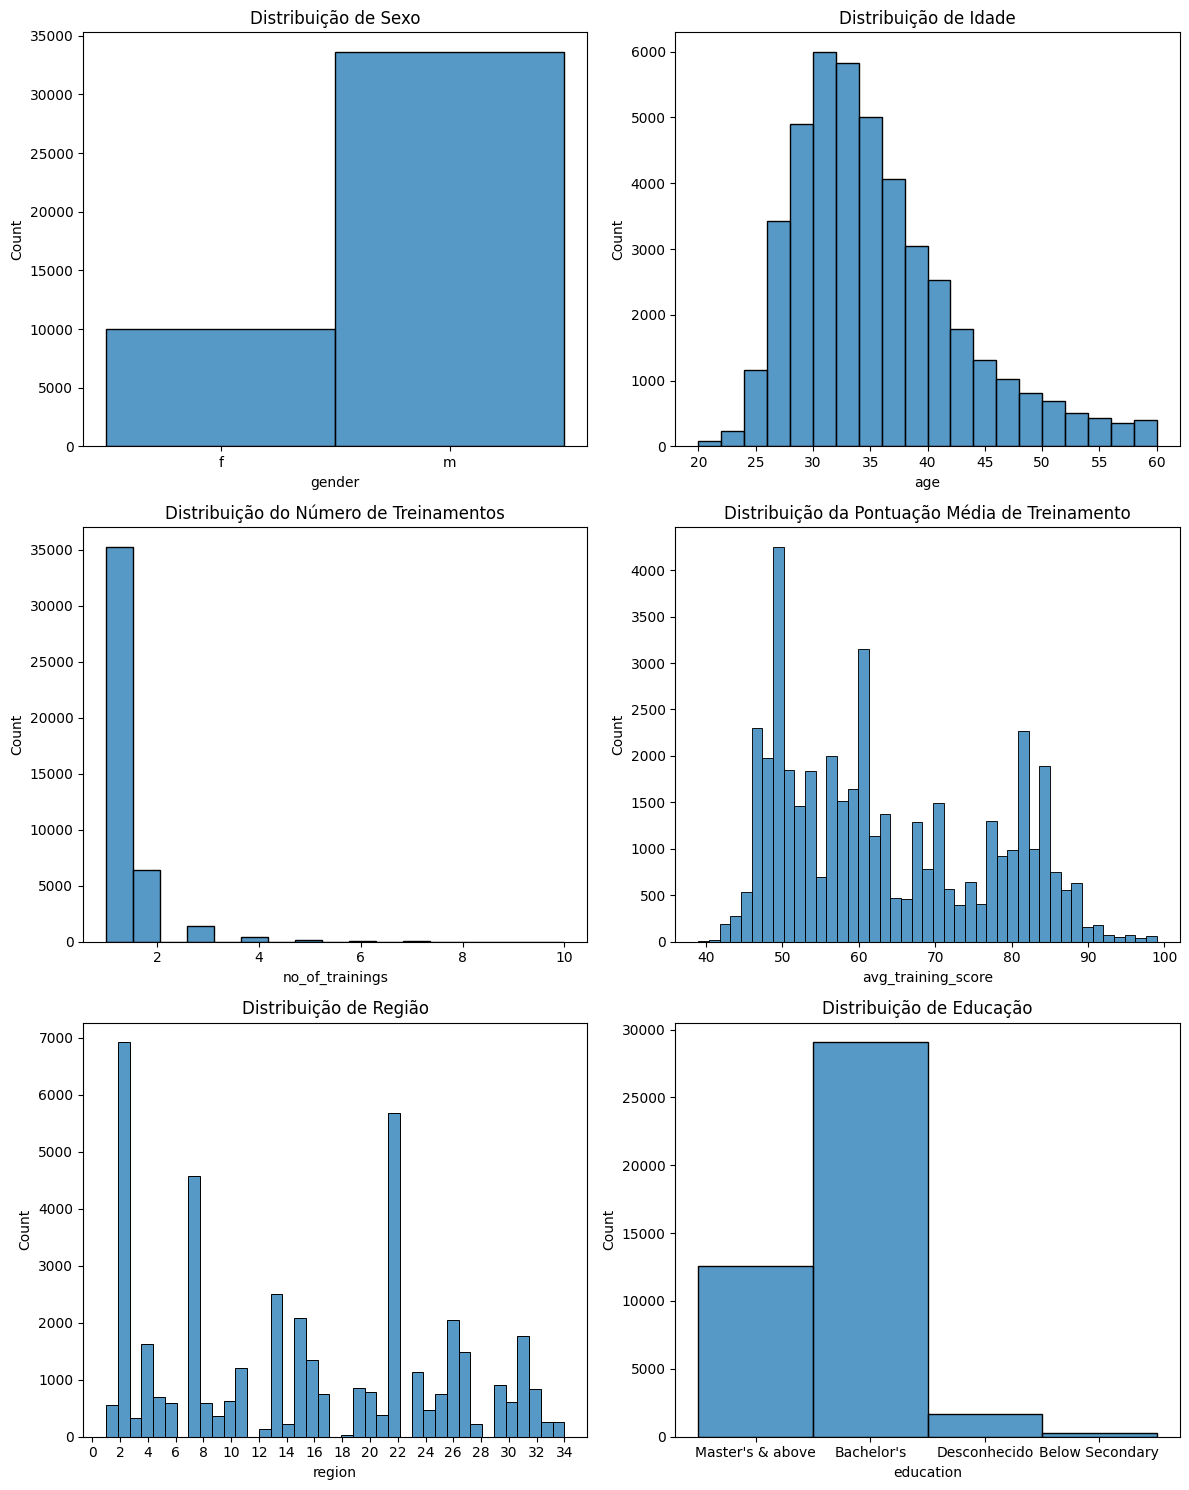

In [15]:
# Criando o subplot 3x2 com os 6 histogramas:
plt.figure(figsize=(12, 15))

# Histograma de Sexo
plt.subplot(3, 2, 1)
sns.histplot(data=df, x='gender', kde=False)
plt.title("Distribuição de Sexo")

# Histograma de Idade
plt.subplot(3, 2, 2)
sns.histplot(data=df, x='age', kde=False, bins=20)
plt.title("Distribuição de Idade")

# Histograma do Número de Treinamentos
plt.subplot(3, 2, 3)
sns.histplot(data=df, x='no_of_trainings', kde=False)
plt.title("Distribuição do Número de Treinamentos")

# Histograma da Pontuação Média de Treinamento
plt.subplot(3, 2, 4)
sns.histplot(data=df, x='avg_training_score', kde=False)
plt.title("Distribuição da Pontuação Média de Treinamento")


# Histograma da Região
plt.subplot(3, 2, 5)
sns.histplot(data=df, x='region', kde=False)
plt.title("Distribuição de Região")
plt.xticks(np.arange(0,35,2))

# Histograma da Educação
plt.subplot(3, 2, 6)
sns.histplot(data=df, x='education', kde=False)
plt.title("Distribuição de Educação")

plt.tight_layout()
plt.show()

### 5. Chance média de ser promovido por features:

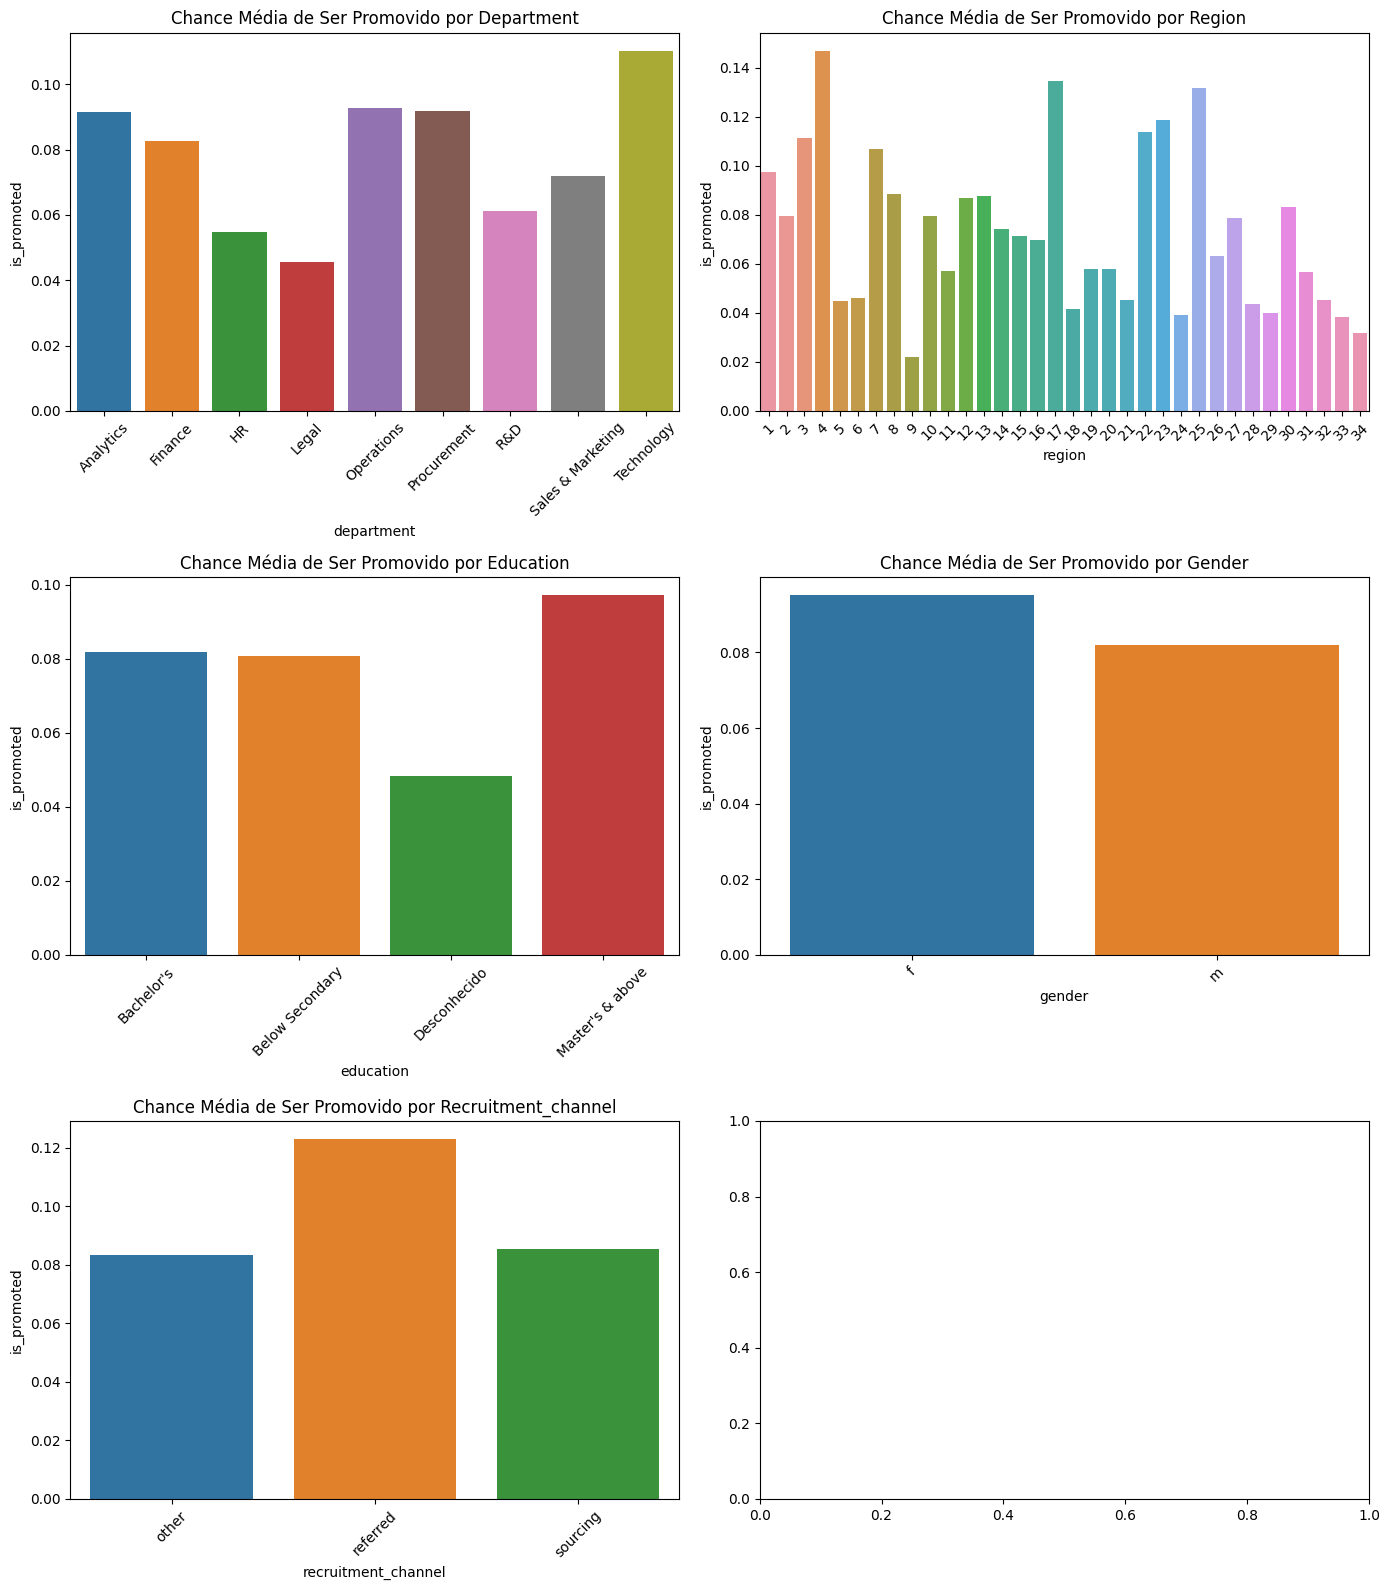

In [16]:
# Criando o subplot para os gráficos de barras
fig, axs = plt.subplots(3, 2, figsize=(14, 16))

# Selecionando as features categóricas:
categorical_features = ['department', 'region', 'education', 'gender', 'recruitment_channel']

#Gerando gráficos de chance média de ser promovido por feature:
for idx, feature in enumerate(categorical_features):
    proportions = df.groupby(feature)['is_promoted'].apply(lambda x: (x == 'yes').mean()).reset_index()
    sns.barplot(x=feature, y='is_promoted', data=proportions, ax=axs[idx//2, idx%2])
    axs[idx//2, idx%2].set_title(f"Chance Média de Ser Promovido por {feature.capitalize()}")
    axs[idx//2, idx%2].set_xticklabels(axs[idx//2, idx%2].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


**Comentários:**

Podemos observar que o dataset não é balanceado, ou seja, existem mais funcionários pertencentes a uma categoria do que outra. Um exemplo é a feature "gender", que possui mais do que o dobro de homens do que mulheres.

Entre as features individuais, destacam-se também as features "education", que demonstra que a maioria dos funcionários tem ensino superior (graduação), e a feature "região", que mostra que a distribuição de funcionários por região é desigual, e também a distribuição da feature "age", que demonstra que a maioria dos funcionários tem entre 25 e 45 anos.

Além disso, é interessante ressaltar que existe uma correlação entre a chance média de ser promovido e seu tipo de recrutamento, sendo que aqueles que foram indicados para o emprego têm mais chances de serem promovidos.

## Questão C

Encoding Ordinal:

In [17]:
# Mapeando as categorias de 'education':
education_mapping = {"Desconhecido" : 0, "Below Secondary": 1, "Bachelor's": 2, "Master's & above": 3}
df['education'] = df['education'].map(education_mapping)

df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,7,3,f,sourcing,1,35,5.0,8,0,49.0,no
1,Operations,22,2,m,other,1,30,5.0,4,0,60.0,no
2,Sales & Marketing,19,2,m,sourcing,1,34,3.0,7,0,50.0,no
3,Sales & Marketing,23,2,m,other,2,39,1.0,10,0,50.0,no
4,Technology,26,2,m,other,1,45,3.0,2,0,73.0,no


Label Encoding:

In [18]:
#Revertendo minha mudança no "is_promoted":
df['is_promoted'] = df['is_promoted'].map({'no' : 0, 'yes' : 1})

#Mapeando o recruitment_channel:
recruitment_channel_mapping = {
    'other': 0,
    'sourcing': 1,
    'referred': 2
}
df['recruitment_channel'] = df['recruitment_channel'].map(recruitment_channel_mapping)


#Mapeando o gênero:
gender_mapping = {
    'f': 0,
    'm': 1,
}
df['gender'] = df['gender'].map(gender_mapping)


#Mapeando o departamento:
department_mapping = {
    'Sales & Marketing': 0,
    'Operations': 1,
    'Technology': 2,
    'Analytics': 3,
    'R&D': 4,
    'Procurement': 5,
    'Finance': 6,
    'HR': 7,
    'Legal': 8,
}
df['department'] = df['department'].map(department_mapping)

df.head(100)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,0,7,3,0,1,1,35,5.0,8,0,49.0,0
1,1,22,2,1,0,1,30,5.0,4,0,60.0,0
2,0,19,2,1,1,1,34,3.0,7,0,50.0,0
3,0,23,2,1,0,2,39,1.0,10,0,50.0,0
4,2,26,2,1,0,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,2,2,1,1,1,35,4.0,6,0,77.0,0
96,0,25,3,1,0,1,34,5.0,7,0,51.0,1
97,5,34,3,1,1,1,37,5.0,3,1,92.0,1
98,5,2,3,1,1,2,47,3.0,5,0,71.0,0


## Questão D

Utilizando a função do sklearn *MinMaxScaler()* para normalizar as features contínuas entre 0 e 1:

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Selecionando as colunas com variáveis contínuas
continuous_columns = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']

# Inicializando o MinMaxScaler
scaler = MinMaxScaler()

# Normalizando as colunas selecionadas
df[continuous_columns] = scaler.fit_transform(df[continuous_columns])

df.head(100)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,0,7,3,0,1,0.000000,0.375,1.00,0.194444,0,0.166667,0
1,1,22,2,1,0,0.000000,0.250,1.00,0.083333,0,0.350000,0
2,0,19,2,1,1,0.000000,0.350,0.50,0.166667,0,0.183333,0
3,0,23,2,1,0,0.111111,0.475,0.00,0.250000,0,0.183333,0
4,2,26,2,1,0,0.000000,0.625,0.50,0.027778,0,0.566667,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,2,2,1,1,0.000000,0.375,0.75,0.138889,0,0.633333,0
96,0,25,3,1,0,0.000000,0.350,1.00,0.166667,0,0.200000,1
97,5,34,3,1,1,0.000000,0.425,1.00,0.055556,1,0.883333,1
98,5,2,3,1,1,0.111111,0.675,0.50,0.111111,0,0.533333,0


## Questão E

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Separando as features do target:
x = df.drop('is_promoted', axis=1) #features
y = df['is_promoted']              #target

# Dividindo: os dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Inicializar variáveis para armazenar os resultados
best_accuracy = 0.0
best_k = 0

# Realizando o treino para diversos valores de K:
for k in range(1, 10):
    # Inicializando o modelo KNN:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Treinando o modelo:
    knn.fit(x_train, y_train)
    
    # Realizando a previsão no conjunto de teste:
    y_pred = knn.predict(x_test)
    
    # Calculando a acurácia do modelo:
    accuracy = accuracy_score(y_test, y_pred)
    
    # Verificando se a acurácia atual é maior do que a melhor acurácia:
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Melhor valor de K: {best_k}")
print(f"Acurácia do modelo para o melhor valor de K: {best_accuracy:.2f}")


Melhor valor de K: 4
Acurácia do modelo para o melhor valor de K: 0.91


## Questão F

Sim, o balanceamento dos dados não foi realizado antes de treinar o modelo, o que pode afetar seu desempenho. 

Isso é especialmente importante nesse modelo, pois os dados da amostra são desbalanceados, ou seja, a distribuição das classes (features) não é uniforme, como foi possível observar na análise rápida do dataset realizada anteriormente.

O desbalanceamento pode levar a problemas no desempenho do modelo de Machine Learning, principalmente em modelos de classificação, como o KNN. Isso ocorre porque o modelo pode se tornar enviesado em direção à classe majoritária, ignorando a classe minoritária. Como resultado, o modelo pode ter uma alta precisão na classe majoritária, mas terá uma baixa capacidade de identificar corretamente exemplos da classe minoritária.

## Questão G

A precisão e o recall são métricas de avaliação de modelos de classificação que são mais adequadas para lidar com dados desbalanceados.

A precisão é a proporção de exemplos classificados corretamente como positivos em relação ao total de exemplos classificados como positivos: 

$\text{Precisão} = \frac{\text{Verdadeiros Positivos}}{\text{Verdadeiros Positivos} + \text{Falsos Positivos}}$

Em outras palavras, é a capacidade do modelo de evitar classificar exemplos negativos como positivos (falsos positivos).

<br>

O recall é a proporção de exemplos positivos classificados corretamente em relação ao total de exemplos positivos:

$\text{Recall} = \frac{\text{Verdadeiros Positivos}}{\text{Verdadeiros Positivos} + \text{Falsos Negativos}}$ 

Em outras palavras, é a capacidade do modelo de encontrar todos os exemplos positivos (evitar falsos negativos).

In [21]:
from sklearn.metrics import precision_score, recall_score

# Fazendo previsões nos dados de teste:
y_pred = knn.predict(x_test)

# Calculando a precisão e o recall:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precisão:", precision)
print("Recall:", recall)


Precisão: 0.7428571428571429
Recall: 0.03324808184143223



**Conclusões:**

O modelo apresentou uma precisão de 74.29%, indicando que é capaz de evitar classificações errôneas de exemplos negativos como positivos (evitar falsos positivos). No entanto, o recall foi de apenas 3.32%, mostrando que o modelo tem dificuldade em identificar a maioria dos exemplos positivos reais, resultando em uma alta taxa de falsos negativos. 

Essa situação é comum em dados desbalanceados, onde a classe majoritária predomina e o modelo tende a se inclinar para essa classe, prejudicando a detecção da classe minoritária. 